In [0]:
!mkdir ~/.kaggle

In [2]:
ls

sample_data/


In [3]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d puneet6060/intel-image-classification

 95% 330M/346M [00:02<00:00, 150MB/s]
100% 346M/346M [00:03<00:00, 120MB/s]


In [6]:
!unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jpg  
  inflating: seg_train/seg_train/mountain/7695.jp

In [7]:
ls

intel-image-classification.zip  sample_data/  seg_test/
kaggle.json                     seg_pred/     seg_train/


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [0]:
train_dir = "seg_train/seg_train/"
val_dir = "seg_test/seg_test"

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.image as mpimg

train_datagen = ImageDataGenerator(rescale = 1.0/255.0)
val_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size=64,
                                                   target_size = (150,150),class_mode="sparse")

val_generator = val_datagen.flow_from_directory(val_dir, batch_size = 64, target_size = (150,150), class_mode = "sparse")

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


# Custom Model

In [0]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, input_shape = (150,150,3), kernel_size = 3),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, kernel_size = 3),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32,kernel_size = 3),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, "relu"),
    tf.keras.layers.Dense(64, "relu"),
    tf.keras.layers.Dense(6, "softmax")
])

In [0]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-5, momentum=0.99)
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-8 * 10**(epochs * 0.6))
optimizer = tf.keras.optimizers.SGD(learning_rate = 2e-6, momentum=0.99)
model.compile(optimizer = optimizer, loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['acc'])

In [15]:
history = model.fit(train_generator, epochs = 10,validation_data=val_generator, callbacks = [lr_schedule], verbose = 2,steps_per_epoch=200, validation_steps=200 )

Epoch 1/10
200/200 - 37s - loss: 1.8356 - acc: 0.1455 - val_loss: 1.8161 - val_acc: 0.1255 - lr: 1.0000e-08
Epoch 2/10
200/200 - 37s - loss: 1.8048 - acc: 0.1632 - val_loss: 1.7736 - val_acc: 0.2216 - lr: 3.9811e-08
Epoch 3/10
200/200 - 36s - loss: 1.7732 - acc: 0.2051 - val_loss: 1.7445 - val_acc: 0.2634 - lr: 1.5849e-07
Epoch 4/10
200/200 - 37s - loss: 1.7195 - acc: 0.2715 - val_loss: 1.6555 - val_acc: 0.3347 - lr: 6.3096e-07
Epoch 5/10
200/200 - 36s - loss: 1.5587 - acc: 0.3851 - val_loss: 1.4317 - val_acc: 0.4575 - lr: 2.5119e-06
Epoch 6/10
200/200 - 36s - loss: 1.3384 - acc: 0.4870 - val_loss: 1.2802 - val_acc: 0.5064 - lr: 1.0000e-05
Epoch 7/10
200/200 - 36s - loss: 1.1929 - acc: 0.5428 - val_loss: 1.1870 - val_acc: 0.5449 - lr: 3.9811e-05
Epoch 8/10
200/200 - 36s - loss: 1.1820 - acc: 0.5459 - val_loss: 1.1985 - val_acc: 0.5609 - lr: 1.5849e-04
Epoch 9/10
200/200 - 36s - loss: 1.1206 - acc: 0.5756 - val_loss: 1.2865 - val_acc: 0.4948 - lr: 6.3096e-04
Epoch 10/10
200/200 - 36s - 

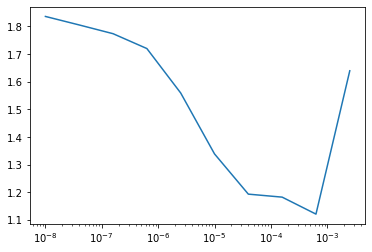

In [16]:
x = 1e-8 * 10**(np.arange(10) * 0.6)  
y = history.history['loss']
plt.semilogx(x,y)

In [0]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 1e-5, momentum=0.99)
model.compile(optimizer = optimizer, loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['acc'])

In [22]:
history = model.fit(train_generator, epochs = 30,validation_data=val_generator, verbose = 1,steps_per_epoch=150, validation_steps=150 )

Epoch 1/30
150/150 [==============================] - 28s 186ms/step - loss: 1.6581 - acc: 0.3006 - val_loss: 1.4707 - val_acc: 0.4188
Epoch 2/30
150/150 [==============================] - 28s 186ms/step - loss: 1.3386 - acc: 0.4820 - val_loss: 1.2880 - val_acc: 0.5086
Epoch 3/30
150/150 [==============================] - 28s 186ms/step - loss: 1.2437 - acc: 0.5190 - val_loss: 1.2386 - val_acc: 0.5351
Epoch 4/30
150/150 [==============================] - 28s 187ms/step - loss: 1.1941 - acc: 0.5456 - val_loss: 1.2062 - val_acc: 0.5436
Epoch 5/30
150/150 [==============================] - 28s 187ms/step - loss: 1.1651 - acc: 0.5548 - val_loss: 1.1949 - val_acc: 0.5376
Epoch 6/30
150/150 [==============================] - 28s 187ms/step - loss: 1.1379 - acc: 0.5625 - val_loss: 1.1701 - val_acc: 0.5594
Epoch 7/30
150/150 [==============================] - 28s 187ms/step - loss: 1.1094 - acc: 0.5793 - val_loss: 1.1554 - val_acc: 0.5564
Epoch 8/30
150/150 [==============================] - 2

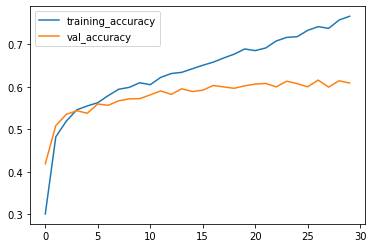

In [23]:

plt.plot(history.history['acc'], label = "training_accuracy")
plt.plot(history.history['val_acc'], label = "val_accuracy")
plt.legend()

# Handling underfitting

In [0]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, input_shape = (150,150,3), kernel_size = 3, kernel_regularizer=tf.keras.regularizers.l2(l = 0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, kernel_size = 3, kernel_regularizer=tf.keras.regularizers.l2(l = 0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, kernel_size = 3, kernel_regularizer=tf.keras.regularizers.l2(l = 0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(32,kernel_size = 3),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, "relu"),
    tf.keras.layers.Dense(64, "relu"),
    tf.keras.layers.Dense(6, "softmax")
])

In [0]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 5e-5, momentum=0.99)
model.compile(optimizer = optimizer, loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['acc'])

In [14]:
history = model.fit(train_generator, epochs = 25,validation_data=val_generator, verbose = 1,steps_per_epoch=150, validation_steps=150 )

Epoch 1/25
150/150 [==============================] - 44s 292ms/step - loss: 2.9692 - acc: 0.4365 - val_loss: 2.8452 - val_acc: 0.4990
Epoch 2/25
150/150 [==============================] - 44s 292ms/step - loss: 2.7104 - acc: 0.5418 - val_loss: 2.7102 - val_acc: 0.5429
Epoch 3/25
150/150 [==============================] - 43s 286ms/step - loss: 2.6327 - acc: 0.5489 - val_loss: 2.6674 - val_acc: 0.5347
Epoch 4/25
150/150 [==============================] - 43s 285ms/step - loss: 2.5156 - acc: 0.5816 - val_loss: 2.5575 - val_acc: 0.5609
Epoch 5/25
150/150 [==============================] - 43s 284ms/step - loss: 2.4175 - acc: 0.6017 - val_loss: 2.4841 - val_acc: 0.5757
Epoch 6/25
150/150 [==============================] - 43s 285ms/step - loss: 2.3339 - acc: 0.6243 - val_loss: 2.3969 - val_acc: 0.5914
Epoch 7/25
150/150 [==============================] - 43s 287ms/step - loss: 2.2585 - acc: 0.6400 - val_loss: 2.3784 - val_acc: 0.5812
Epoch 8/25
150/150 [==============================] - 4

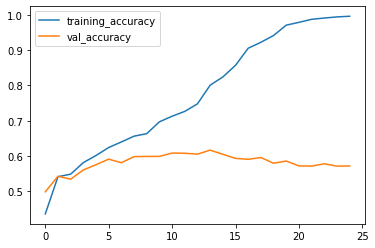

In [15]:

plt.plot(history.history['acc'], label = "training_accuracy")
plt.plot(history.history['val_acc'], label = "val_accuracy")
plt.legend()

# Handling overfitting

In [0]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, input_shape = (150,150,3), kernel_size = 3, kernel_regularizer=tf.keras.regularizers.l2(l = 0.1)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(64, kernel_size = 3, kernel_regularizer=tf.keras.regularizers.l2(l = 0.1)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(64, kernel_size = 3, kernel_regularizer=tf.keras.regularizers.l2(l = 0.1)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(32,kernel_size = 3),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, "relu"),
    tf.keras.layers.Dense(64, "relu"),
    tf.keras.layers.Dense(6, "softmax")
])

In [0]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 5e-5, momentum=0.99)
model.compile(optimizer = optimizer, loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['acc'])

In [33]:
history = model.fit(train_generator, epochs = 20,validation_data=val_generator, verbose = 1,steps_per_epoch=150, validation_steps=150 )

Epoch 1/20
150/150 [==============================] - 41s 275ms/step - loss: 3.1027 - acc: 0.3639 - val_loss: 2.8600 - val_acc: 0.4986
Epoch 2/20
150/150 [==============================] - 41s 272ms/step - loss: 2.7566 - acc: 0.5207 - val_loss: 2.6949 - val_acc: 0.5428
Epoch 3/20
150/150 [==============================] - 41s 275ms/step - loss: 2.6494 - acc: 0.5498 - val_loss: 2.6323 - val_acc: 0.5353
Epoch 4/20
150/150 [==============================] - 41s 274ms/step - loss: 2.5365 - acc: 0.5753 - val_loss: 2.5556 - val_acc: 0.5699
Epoch 5/20
150/150 [==============================] - 41s 273ms/step - loss: 2.4410 - acc: 0.5935 - val_loss: 2.4827 - val_acc: 0.5783
Epoch 6/20
150/150 [==============================] - 41s 273ms/step - loss: 2.3702 - acc: 0.6104 - val_loss: 2.4073 - val_acc: 0.5895
Epoch 7/20
150/150 [==============================] - 41s 274ms/step - loss: 2.2906 - acc: 0.6201 - val_loss: 2.3907 - val_acc: 0.5824
Epoch 8/20
150/150 [==============================] - 4

# MobNet V2

In [0]:
tf.keras.backend.clear_session()

In [0]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (150,150,3), include_top=False, weights='imagenet', )

9412608/9406464 [==============================] - 0s 0us/step


In [0]:
base_model.trainable = False

In [0]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 151, 151, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [0]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [0]:
prediction_layer = tf.keras.layers.Dense(6, "softmax")

In [0]:
model = tf.keras.models.Sequential([
                                    base_model,
                                    global_average_layer,
                                    prediction_layer
])

In [0]:
model.compile(optimizer = optimizer, loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['acc'])


In [0]:
len(model.trainable_variables)

2

In [0]:
history = model.fit(train_generator, epochs = 20,validation_data=val_generator, verbose = 2,steps_per_epoch=100, validation_steps=100 )

Epoch 1/20
100/100 - 14s - loss: 1.2429 - acc: 0.5291 - val_loss: 0.4632 - val_acc: 0.8312
Epoch 2/20
100/100 - 14s - loss: 0.3878 - acc: 0.8645 - val_loss: 0.3732 - val_acc: 0.8690
Epoch 3/20
100/100 - 14s - loss: 0.3528 - acc: 0.8759 - val_loss: 0.3453 - val_acc: 0.8842
Epoch 4/20
100/100 - 14s - loss: 0.3341 - acc: 0.8872 - val_loss: 0.3404 - val_acc: 0.8791
Epoch 5/20
100/100 - 14s - loss: 0.3170 - acc: 0.8927 - val_loss: 0.3417 - val_acc: 0.8758
Epoch 6/20
100/100 - 14s - loss: 0.3126 - acc: 0.8900 - val_loss: 0.3120 - val_acc: 0.8880
Epoch 7/20
100/100 - 14s - loss: 0.2825 - acc: 0.8995 - val_loss: 0.3026 - val_acc: 0.8891
Epoch 8/20
100/100 - 14s - loss: 0.2764 - acc: 0.9026 - val_loss: 0.2988 - val_acc: 0.8910
Epoch 9/20
100/100 - 14s - loss: 0.2585 - acc: 0.9108 - val_loss: 0.2901 - val_acc: 0.8938
Epoch 10/20
100/100 - 14s - loss: 0.2774 - acc: 0.9027 - val_loss: 0.2893 - val_acc: 0.8954
Epoch 11/20
100/100 - 14s - loss: 0.2544 - acc: 0.9116 - val_loss: 0.2862 - val_acc: 0.89

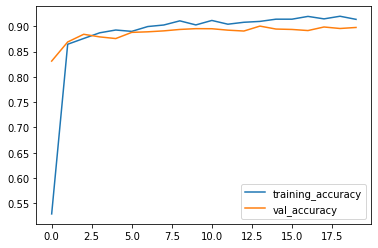

In [0]:
  #batch_size = 256
plt.plot(history.history['acc'], label = "training_accuracy")
plt.plot(history.history['val_acc'], label = "val_accuracy")
plt.legend()

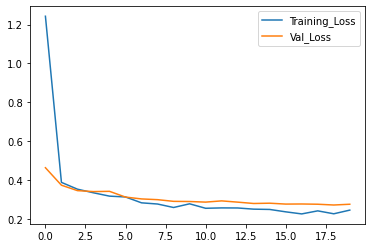

In [0]:
plt.plot(history.history['loss'], label = "Training_Loss")
plt.plot(history.history['val_loss'], label = "Val_Loss")
plt.legend()